In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/content/cleaned_dataset_flight.csv')

In [6]:
df.isnull().sum()

,0
DayOfWeek,0
Date,0
DepTime,0
ArrTime,0
CRSArrTime,0
UniqueCarrier,0
Airline,0
FlightNum,0
TailNum,0
ActualElapsedTime,0


**Route and Airport-Level Analysis**

In [7]:
# Top 10 origin-destination pairs
top_routes = df['Route'].value_counts().head(10)
display(top_routes)

,count
Route,
ORD-LGA,1414
LAX-SFO,1262
LGA-ORD,1186
SFO-LAX,1134
LAS-LAX,1045
HOU-DAL,1018
DAL-HOU,977
PHX-LAS,891
DFW-ORD,882


In [9]:
# Top 10 origin airports
top_origin_airports = df['Origin'].value_counts().head(10)
display(top_origin_airports)

,count
Origin,
ORD,35397
DFW,21928
ATL,21852
DEN,17669
LAX,13678
LAS,12454
SFO,11605
PHX,10907
SLC,7621


In [10]:
# Top 10 destination airports
top_destination_airports = df['Dest'].value_counts().head(10)
display(top_destination_airports)

,count
Dest,
ORD,30137
ATL,17941
DFW,16357
DEN,14508
LAX,14247
SFO,12267
LAS,11941
PHX,9868
SLC,7701


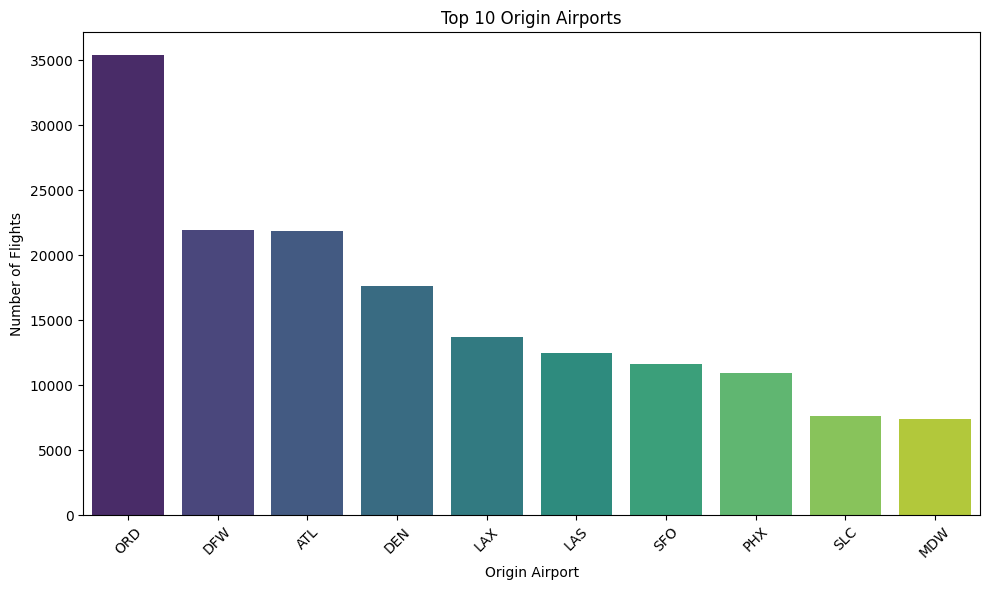

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize top 10 origin airports
plt.figure(figsize=(10, 6))
sns.barplot(x=top_origin_airports.index, y=top_origin_airports.values, hue=top_origin_airports.index, palette='viridis', legend=False)
plt.title('Top 10 Origin Airports')
plt.xlabel('Origin Airport')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

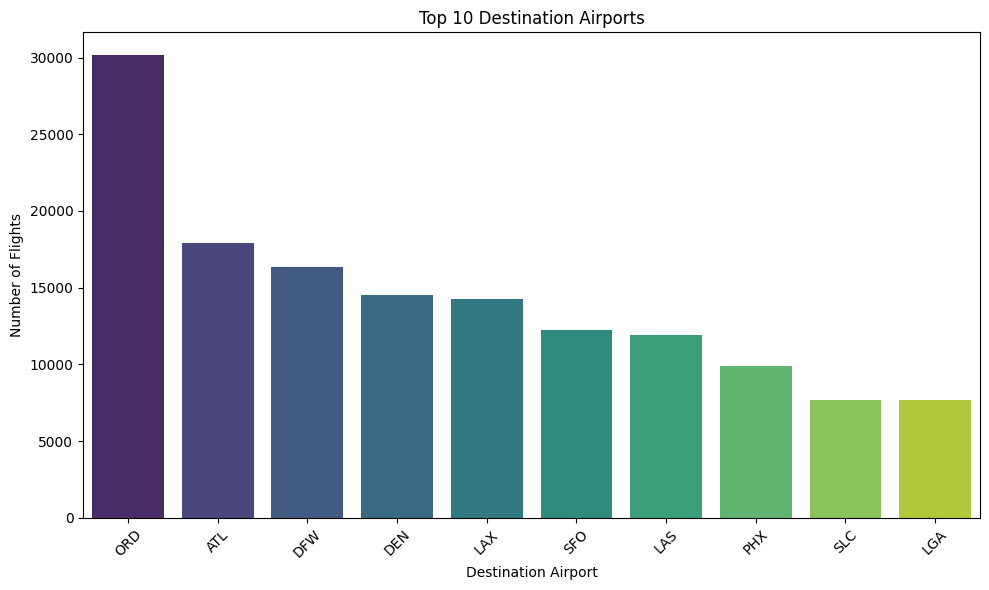

In [14]:
# Visualize top 10 destination airports
plt.figure(figsize=(10, 6))
sns.barplot(x=top_destination_airports.index, y=top_destination_airports.values, hue=top_destination_airports.index, palette='viridis', legend=False)
plt.title('Top 10 Destination Airports')
plt.xlabel('Destination Airport')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

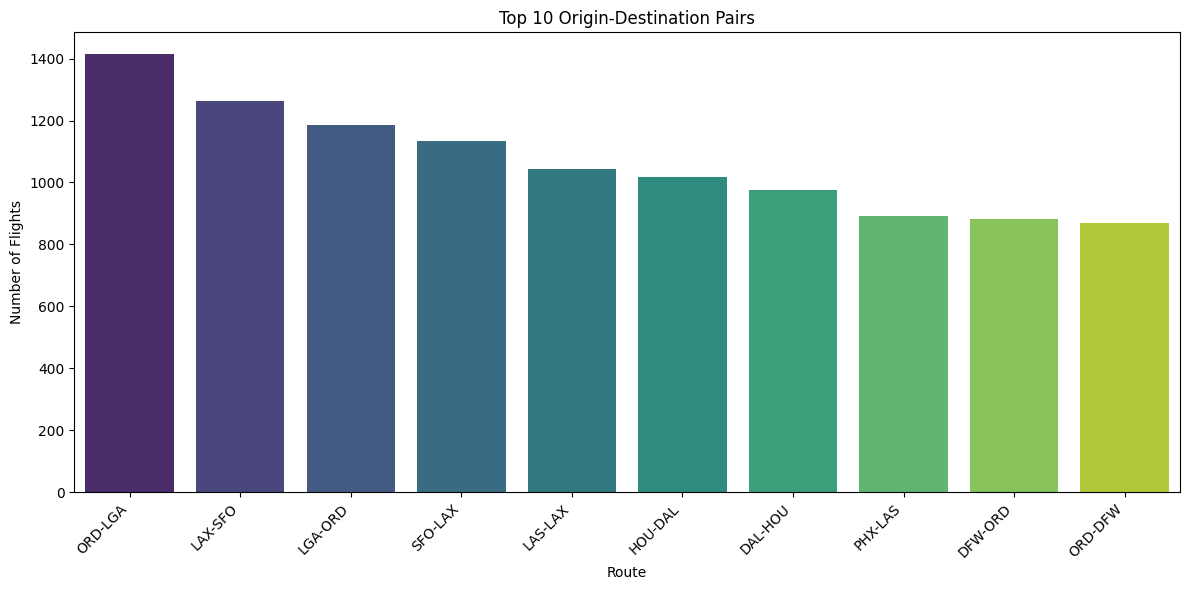

In [15]:
# Visualize top 10 origin-destination pairs
plt.figure(figsize=(12, 6))
sns.barplot(x=top_routes.index, y=top_routes.values, hue=top_routes.index, palette='viridis', legend=False)
plt.title('Top 10 Origin-Destination Pairs')
plt.xlabel('Route')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45, ha='right') # Rotate labels and align to the right
plt.tight_layout()
plt.show()

In [21]:
# Calculate average arrival and departure delays per route
avg_delays_by_route = df.groupby('Route')[['ArrDelay', 'DepDelay']].mean().reset_index()
display(avg_delays_by_route.head())

,Route,ArrDelay,DepDelay
0,ABE-ATL,99.931818,93.000000
1,ABE-CLT,58.666667,51.666667
2,ABE-ORD,85.916667,74.354167
3,ABI-DFW,118.375000,113.211538
4,ABQ-AMA,45.333333,48.422222


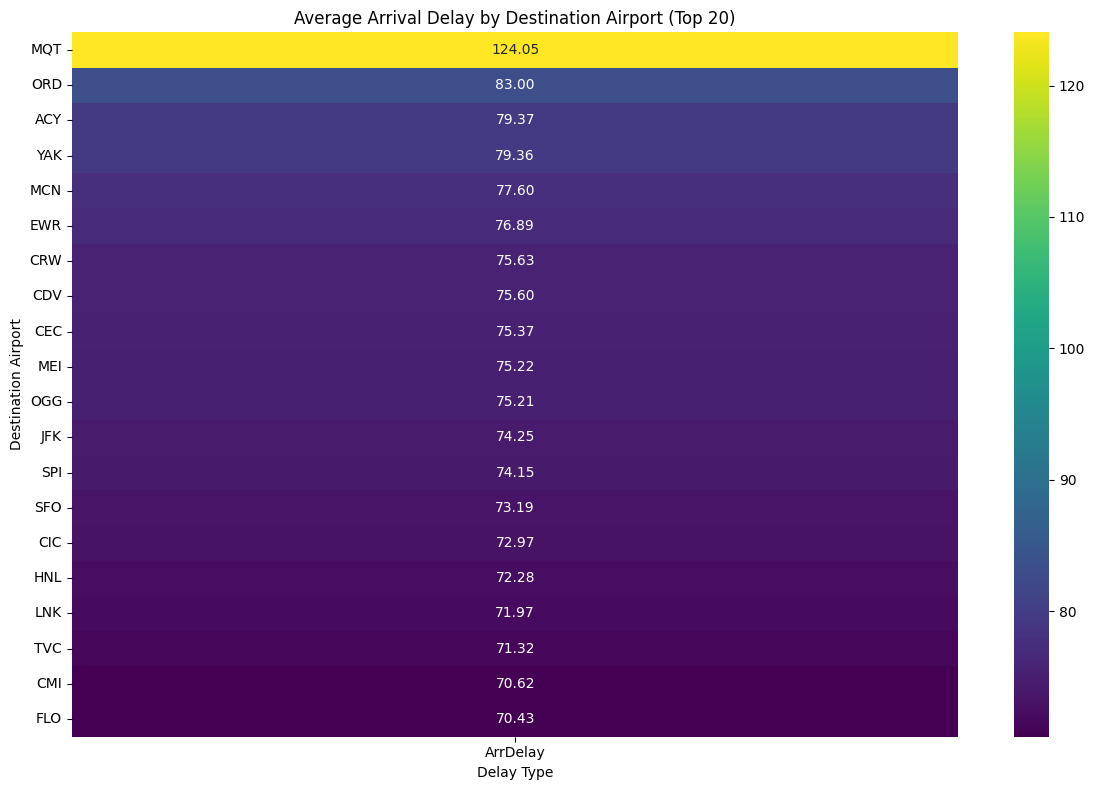

In [24]:
# Calculate average arrival delays by destination airport
avg_arrival_delays_by_dest = df.groupby('Dest')['ArrDelay'].mean().reset_index()

# Sort destination airports by average arrival delay and select the top 20
top_20_dest_airports_arr_delay = avg_arrival_delays_by_dest.sort_values(by='ArrDelay', ascending=False).head(20)

# Create a heatmap for average arrival delays by destination airport
plt.figure(figsize=(12, 8))
sns.heatmap(top_20_dest_airports_arr_delay.set_index('Dest'), annot=True, cmap='viridis', fmt=".2f")
plt.title('Average Arrival Delay by Destination Airport (Top 20)')
plt.xlabel('Delay Type')
plt.ylabel('Destination Airport')
plt.tight_layout()
plt.show()

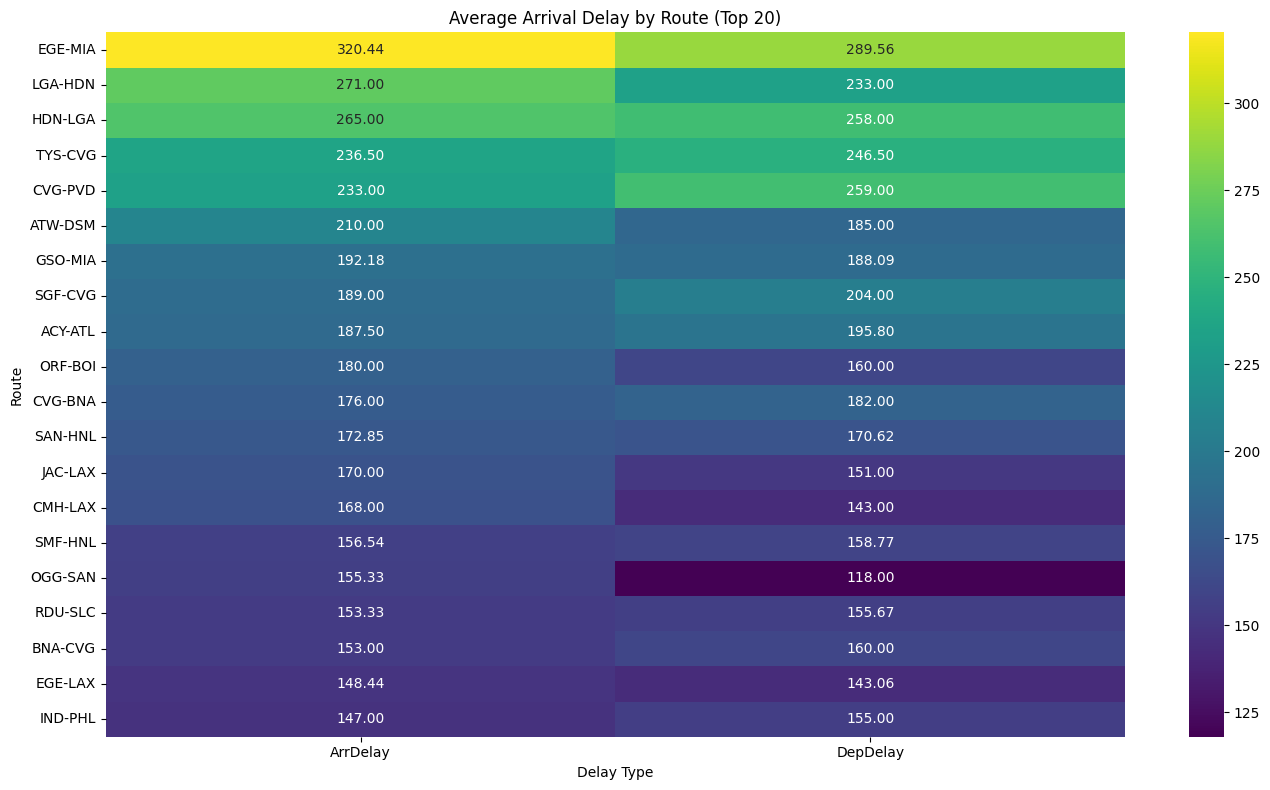

In [23]:
# Sort routes by average arrival delay and select the top 20
top_20_routes_arr_delay = avg_delays_by_route.sort_values(by='ArrDelay', ascending=False).head(20)

# Create a heatmap for average arrival delays by route
plt.figure(figsize=(14, 8))
sns.heatmap(top_20_routes_arr_delay.set_index('Route'), annot=True, cmap='viridis', fmt=".2f")
plt.title('Average Arrival Delay by Route (Top 20)')
plt.xlabel('Delay Type')
plt.ylabel('Route')
plt.tight_layout()
plt.show()

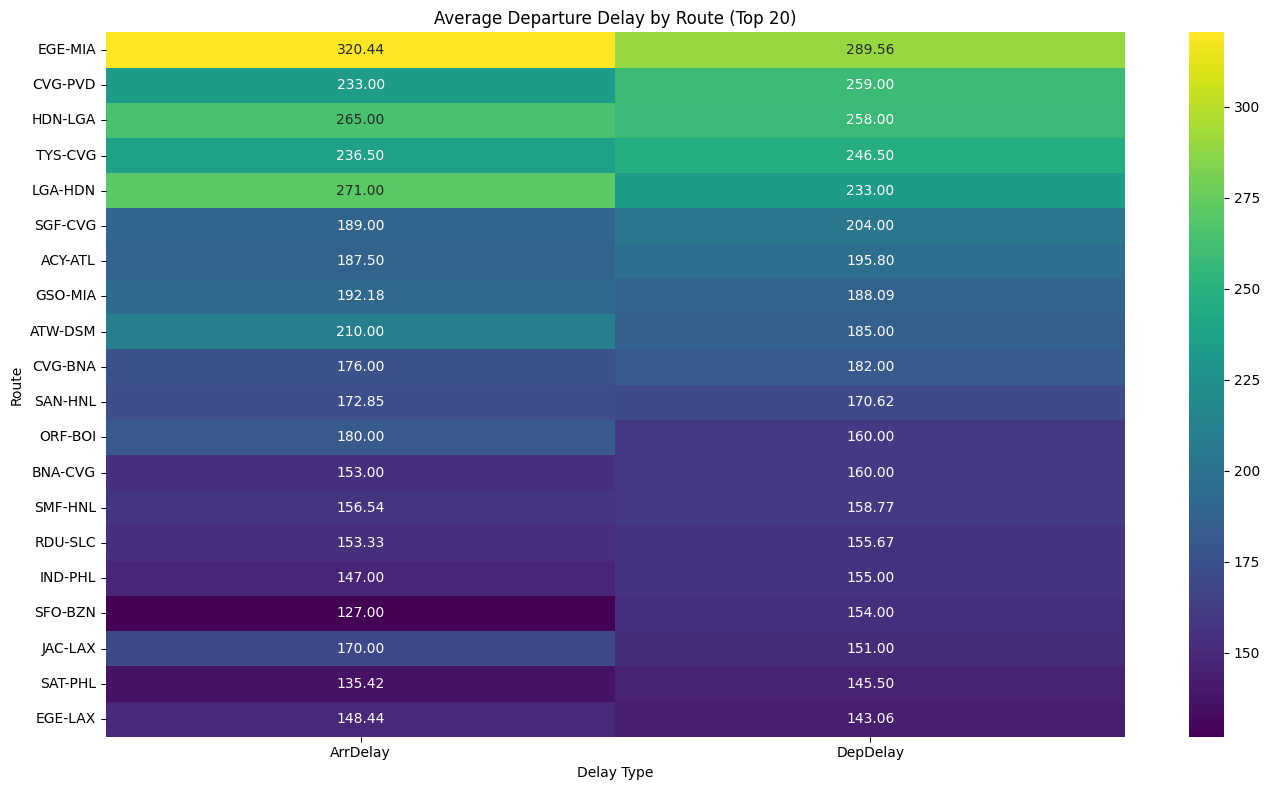

In [27]:
# Sort routes by average departure delay and select the top 20
top_20_routes_dep_delay = avg_delays_by_route.sort_values(by='DepDelay', ascending=False).head(20)

# Create a heatmap for average departure delays by route
plt.figure(figsize=(14, 8))
sns.heatmap(top_20_routes_dep_delay.set_index('Route'), annot=True, cmap='viridis', fmt=".2f")
plt.title('Average Departure Delay by Route (Top 20)')
plt.xlabel('Delay Type')
plt.ylabel('Route')
plt.tight_layout()
plt.show()

In [31]:
# Calculate average arrival and departure delays per origin airport
avg_delays_by_origin = df.groupby('Origin')[['ArrDelay', 'DepDelay']].mean()
display(avg_delays_by_origin.head())

,ArrDelay,DepDelay
Origin,,
ABE,91.547368,82.273684
ABI,118.375000,113.211538
ABQ,49.425812,49.014047
ABY,69.090909,68.597403
ACT,60.428571,60.085714


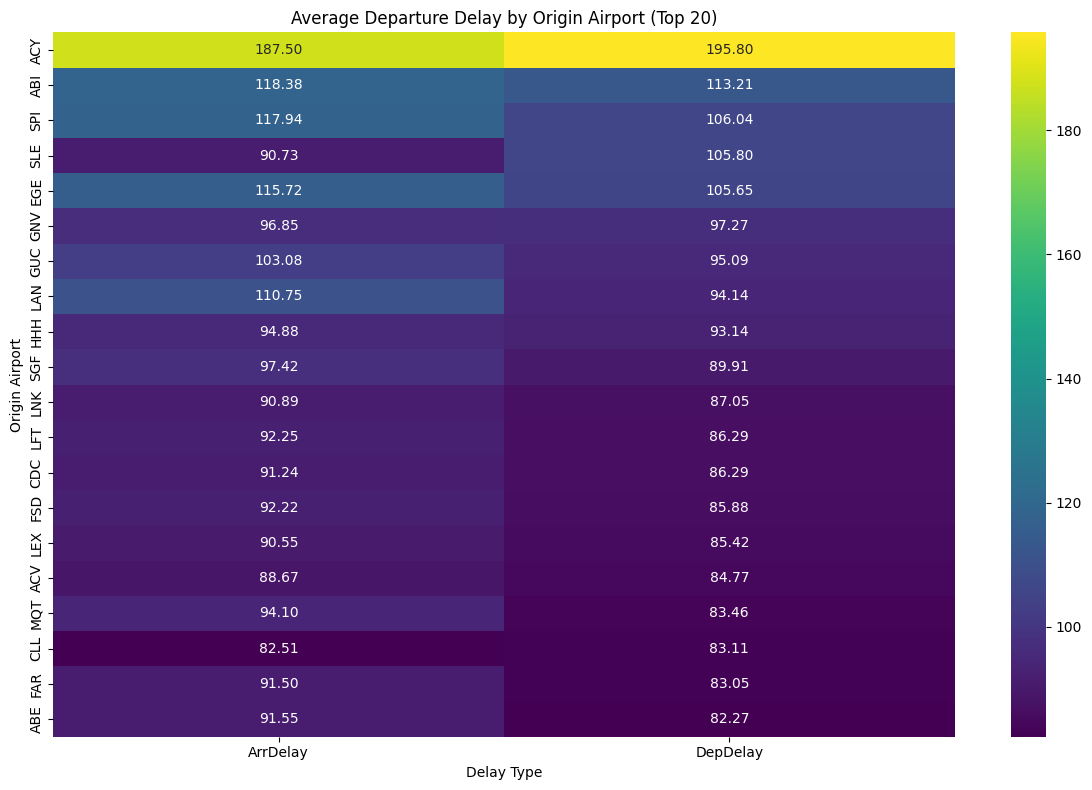

In [32]:
# Sort origin airports by average departure delay and select the top 20
top_20_origin_airports_dep_delay = avg_delays_by_origin.sort_values(by='DepDelay', ascending=False).head(20)

# Create a heatmap for average departure delays by origin airport
plt.figure(figsize=(12, 8))
sns.heatmap(top_20_origin_airports_dep_delay, annot=True, cmap='viridis', fmt=".2f")
plt.title('Average Departure Delay by Origin Airport (Top 20)')
plt.xlabel('Delay Type')
plt.ylabel('Origin Airport')
plt.tight_layout()
plt.show()

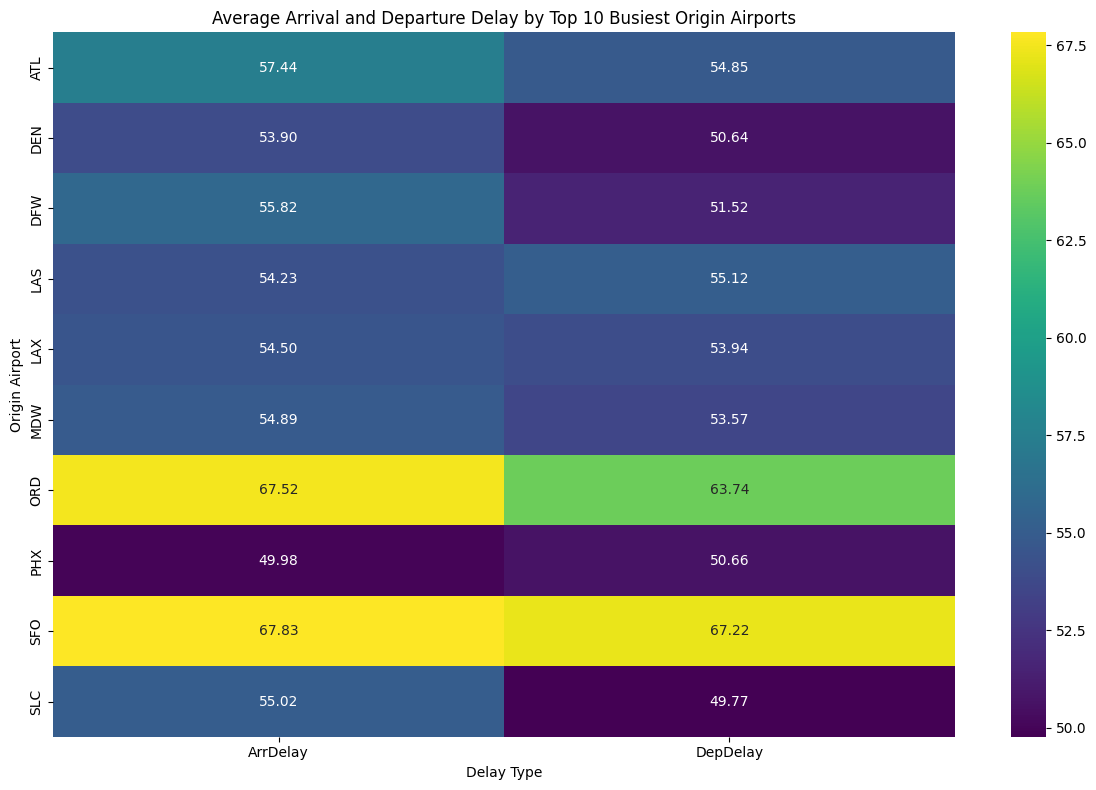

In [38]:
# Filter average delays to include only the top 10 busiest origin airports
top_origin_airports_delay = avg_delays_by_origin[avg_delays_by_origin.index.isin(top_origin_airports.index)]

# Create a heatmap for average delays by top 10 busiest origin airports
plt.figure(figsize=(12, 8))
sns.heatmap(top_origin_airports_delay, annot=True, cmap='viridis', fmt=".2f")
plt.title('Average Arrival and Departure Delay by Top 10 Busiest Origin Airports')
plt.xlabel('Delay Type')
plt.ylabel('Origin Airport')
plt.tight_layout()
plt.show()

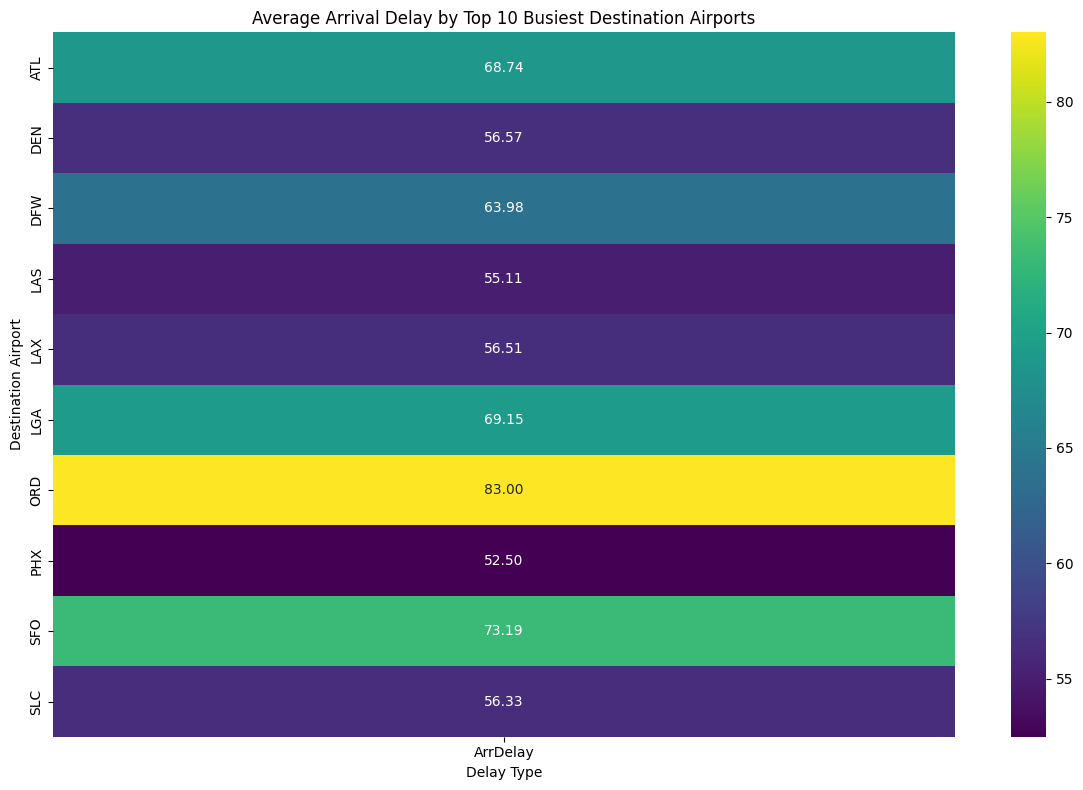

In [39]:
# Filter average delays to include only the top 10 busiest destination airports
top_destination_airports_delay = avg_arrival_delays_by_dest[avg_arrival_delays_by_dest['Dest'].isin(top_destination_airports.index)].set_index('Dest')

# Create a heatmap for average arrival delay by top 10 busiest destination airports
plt.figure(figsize=(12, 8))
sns.heatmap(top_destination_airports_delay[['ArrDelay']], annot=True, cmap='viridis', fmt=".2f")
plt.title('Average Arrival Delay by Top 10 Busiest Destination Airports')
plt.xlabel('Delay Type')
plt.ylabel('Destination Airport')
plt.tight_layout()
plt.show()

In [36]:
# Filter average delays to include only the top 10 busiest routes
top_10_routes_delay = avg_delays_by_route[avg_delays_by_route['Route'].isin(top_routes.index)]

# Sort the top 10 busiest routes by arrival delay
top_10_routes_arr_delay = top_10_routes_delay.sort_values(by='ArrDelay', ascending=False)

# Display the arrival delays for the top 10 busiest routes
display(top_10_routes_arr_delay)

,Route,ArrDelay,DepDelay
1703,LGA-ORD,82.987352,72.047218
999,DFW-ORD,78.388889,69.860544
2240,ORD-LGA,74.736209,69.198020
1654,LAX-SFO,71.603803,67.355784
2824,SFO-LAX,69.250441,69.586420
2206,ORD-DFW,67.296552,64.233333
1284,HOU-DAL,53.959725,49.048134
744,DAL-HOU,52.851586,46.091095
1549,LAS-LAX,51.131100,48.398086
2457,PHX-LAS,49.893378,45.737374
